In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set default style
sns.set(style='whitegrid')

# Load dataset
df = pd.read_csv("Sample - Superstore.csv", encoding='ISO-8859-1')

# Display first few rows
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [6]:
# Convert date columns to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Drop missing values
df.dropna(inplace=True)

# Remove rows with non-positive sales
df = df[df['Sales'] > 0]

# Confirm data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

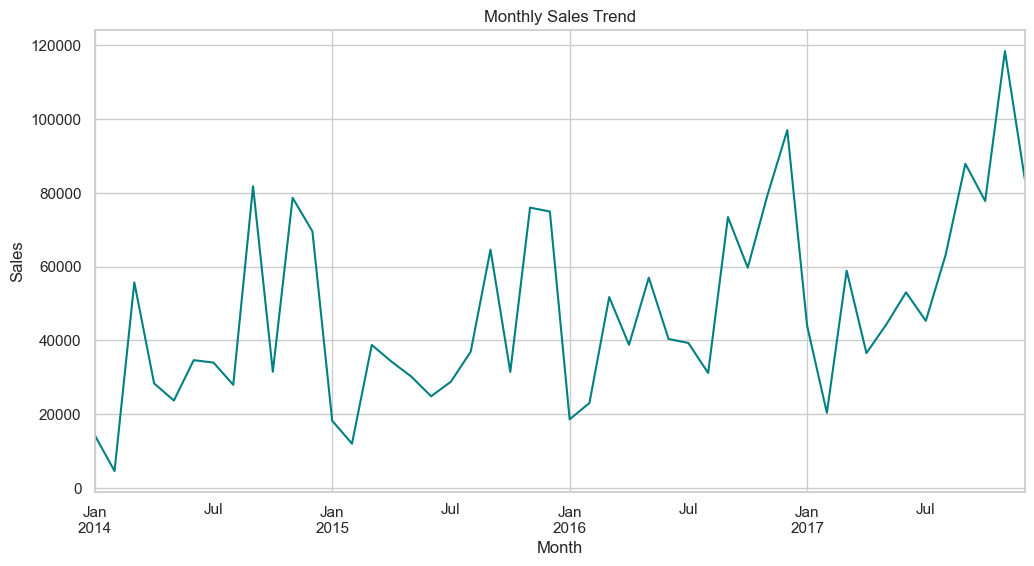

In [7]:
# Group by month
monthly_sales = df.resample('M', on='Order Date')['Sales'].sum()

# Plot monthly sales trend
plt.figure(figsize=(12, 6))
monthly_sales.plot(color='teal')
plt.title("Monthly Sales Trend")
plt.ylabel("Sales")
plt.xlabel("Month")
plt.grid(True)
plt.show()


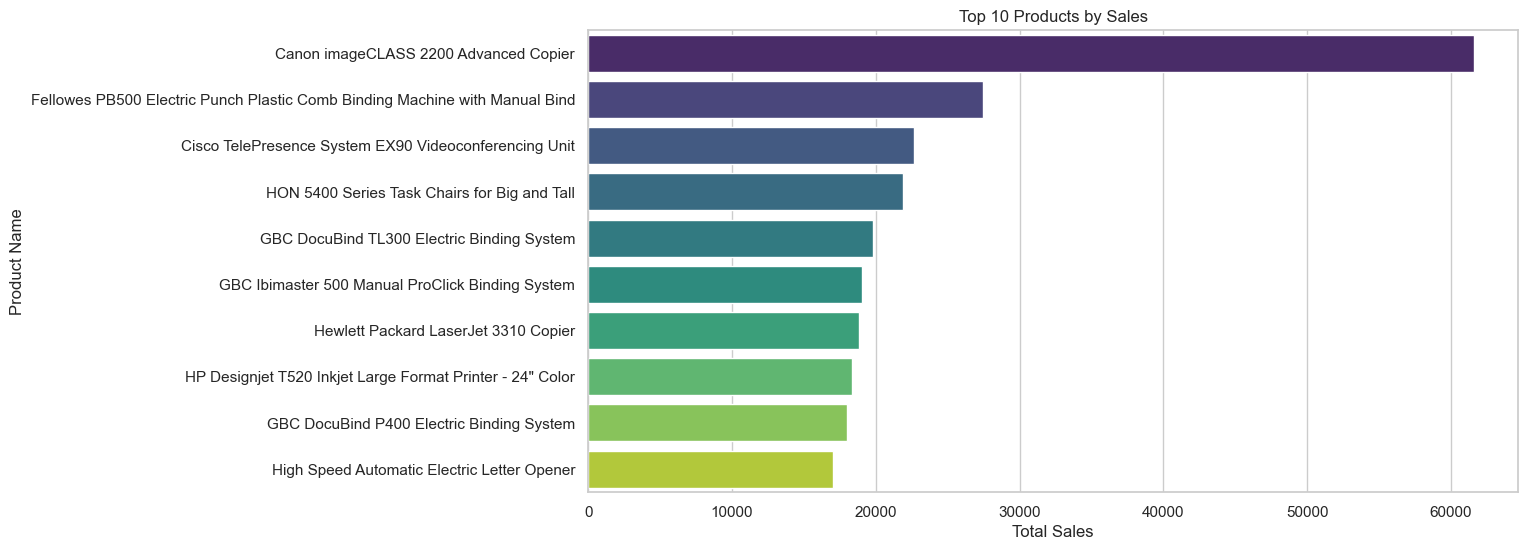

In [8]:
# Top 10 products
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")
plt.title("Top 10 Products by Sales")
plt.xlabel("Total Sales")
plt.ylabel("Product Name")
plt.show()


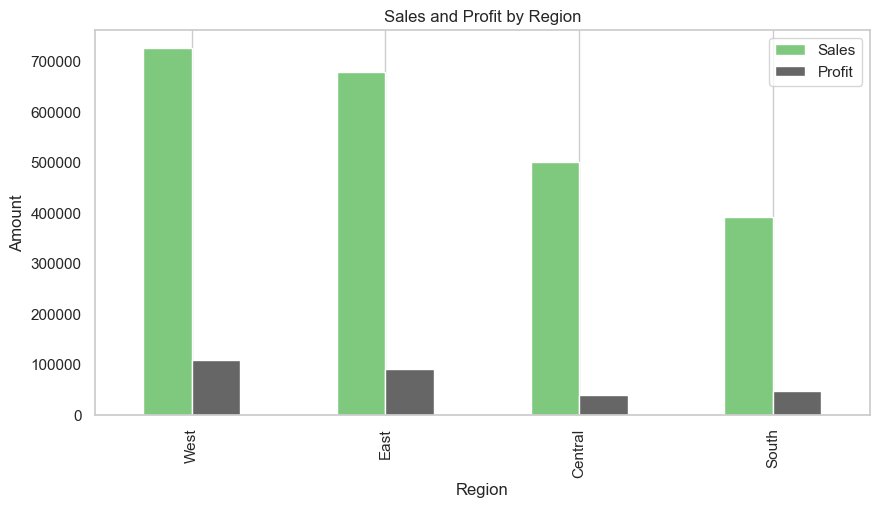

In [9]:
# Sales & profit by region
region_perf = df.groupby('Region')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)

# Plot region performance
region_perf.plot(kind='bar', figsize=(10, 5), colormap='Accent')
plt.title("Sales and Profit by Region")
plt.ylabel("Amount")
plt.grid(axis='y')
plt.show()


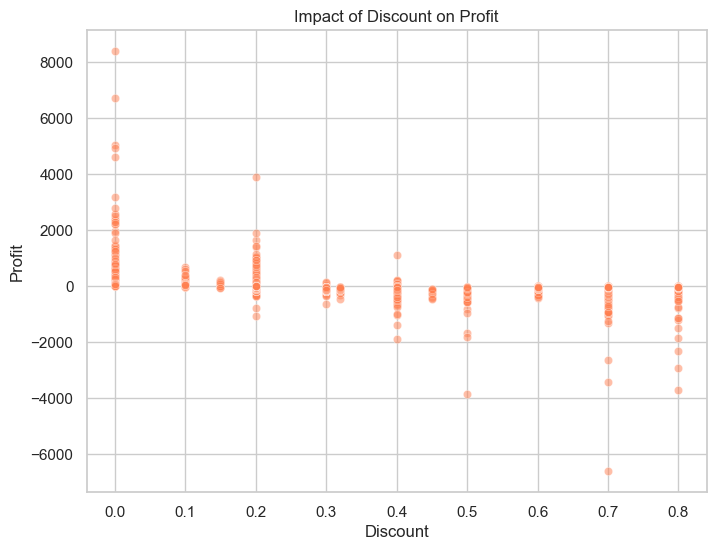

In [10]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Discount', y='Profit', alpha=0.5, color='coral')
plt.title("Impact of Discount on Profit")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.show()


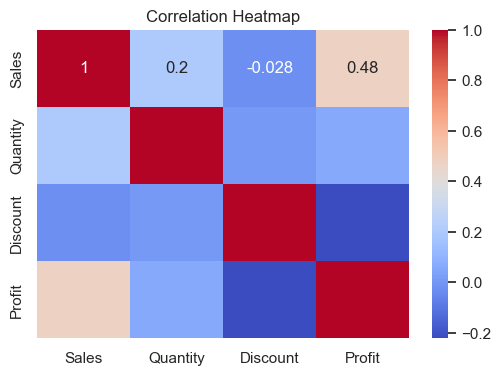

In [11]:
# Correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(df[['Sales', 'Quantity', 'Discount', 'Profit']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [12]:
print("Top 5 Categories by Profit:")
print(df.groupby('Category')['Profit'].sum().sort_values(ascending=False))

print("\nTop 5 Sub-Categories by Sales:")
print(df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).head(5))


Top 5 Categories by Profit:
Category
Technology         145454.9481
Office Supplies    122490.8008
Furniture           18451.2728
Name: Profit, dtype: float64

Top 5 Sub-Categories by Sales:
Sub-Category
Phones     330007.054
Chairs     328449.103
Storage    223843.608
Tables     206965.532
Binders    203412.733
Name: Sales, dtype: float64
